In [1]:
from pylab import *

In [9]:
def RK2(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        x_med = sol[:,i] + 0.5*delta*ec_EDO(t_n[i],sol[:,i])
        sol[:,i+1] = sol[:,i] + delta*ec_EDO(t_med,x_med)
    return sol,t_n

def RK4(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        k1 = ec_EDO(t_n[i],sol[:,i])
        x_med = sol[:,i] + 0.5*delta*k1
        k2 = ec_EDO(t_med,x_med)
        x_med = sol[:,i] + 0.5*delta*k2
        k3 = ec_EDO(t_med,x_med)
        x_med = sol[:,i] + delta*k3
        k4 = ec_EDO(t_n[i+1],x_med)
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return sol,t_n

In [10]:
def ec_dif3(t,y):
    return array([y[1],-y[0]])

In [37]:
y_rk2 , t_2 = RK2(ec_dif3,[0,20*pi],[7,0],delta=0.002)
y_rk4 , t_4 = RK4(ec_dif3,[0,20*pi],[7,0])

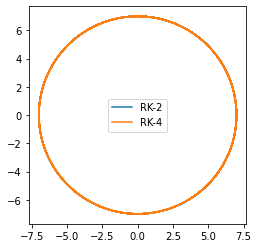

In [38]:
plot(y_rk2[0],y_rk2[1],label='RK-2')
plot(y_rk4[0],y_rk4[1],label='RK-4')
legend()
gca().set_aspect('equal')
show()

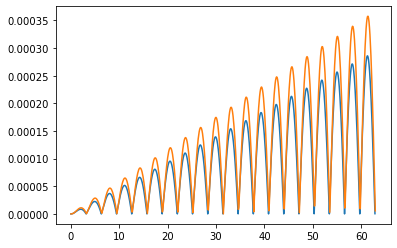

In [39]:
plot(t_2,abs(7*cos(t_2) - y_rk2[0]))
plot(t_4,abs(7*cos(t_4) - y_rk4[0]))
show()

In [40]:
len(t_2),len(t_4)

(31417, 630)